In [9]:
# import necessary packages
# standard
import sys, os, glob
import numpy as np
import pandas as pd
import networkx as nx
from scipy import sparse
from tqdm.notebook import tqdm

# plotting
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from IPython.display import Javascript

# torch
import torch
import torch.nn.functional as F
from torch.nn import Linear

# torch geometric
from torch_geometric.utils import from_scipy_sparse_matrix, from_networkx
from torch_geometric.nn import (GAT, GCNConv, GATConv)
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import (NormalizeFeatures, RandomNodeSplit)
from torch_geometric.data import Data
from torch_geometric import seed_everything

# sklearn
from sklearn.manifold import TSNE

# path
sys.path.append('../')

# custom
from utils.GetFileNames import get_file_names
import utils.preprocessing as pp
import utils.GetLowestGPU as GetLowestGPU

In [10]:
# load in data
network_path = "../data/networks/GTEx_BulkPENs/"
graph_names = get_file_names(network_path, ".txt")

In [11]:
graph_names

['frontalCortex_top0.118pct.txt',
 'frontalCortex_top0.003pct.txt',
 'frontalCortex_top0.376pct.txt']

In [12]:
# convert graphs to node/edge lists and then nx objects
graphs = []
for name in tqdm(graph_names):
    # convert to nx object and append
    graphs.append(pp.convert_to_nx(network_path + name))
print(f"Processed {len(graphs)} graphs!")

  0%|          | 0/3 [00:00<?, ?it/s]

Processed 3 graphs!


In [13]:
# get example graph
example = graphs[1]
print(f"Graph has {len(example.nodes)} nodes and {len(example.edges)} edges.")

Graph has 2612 nodes and 1334 edges.


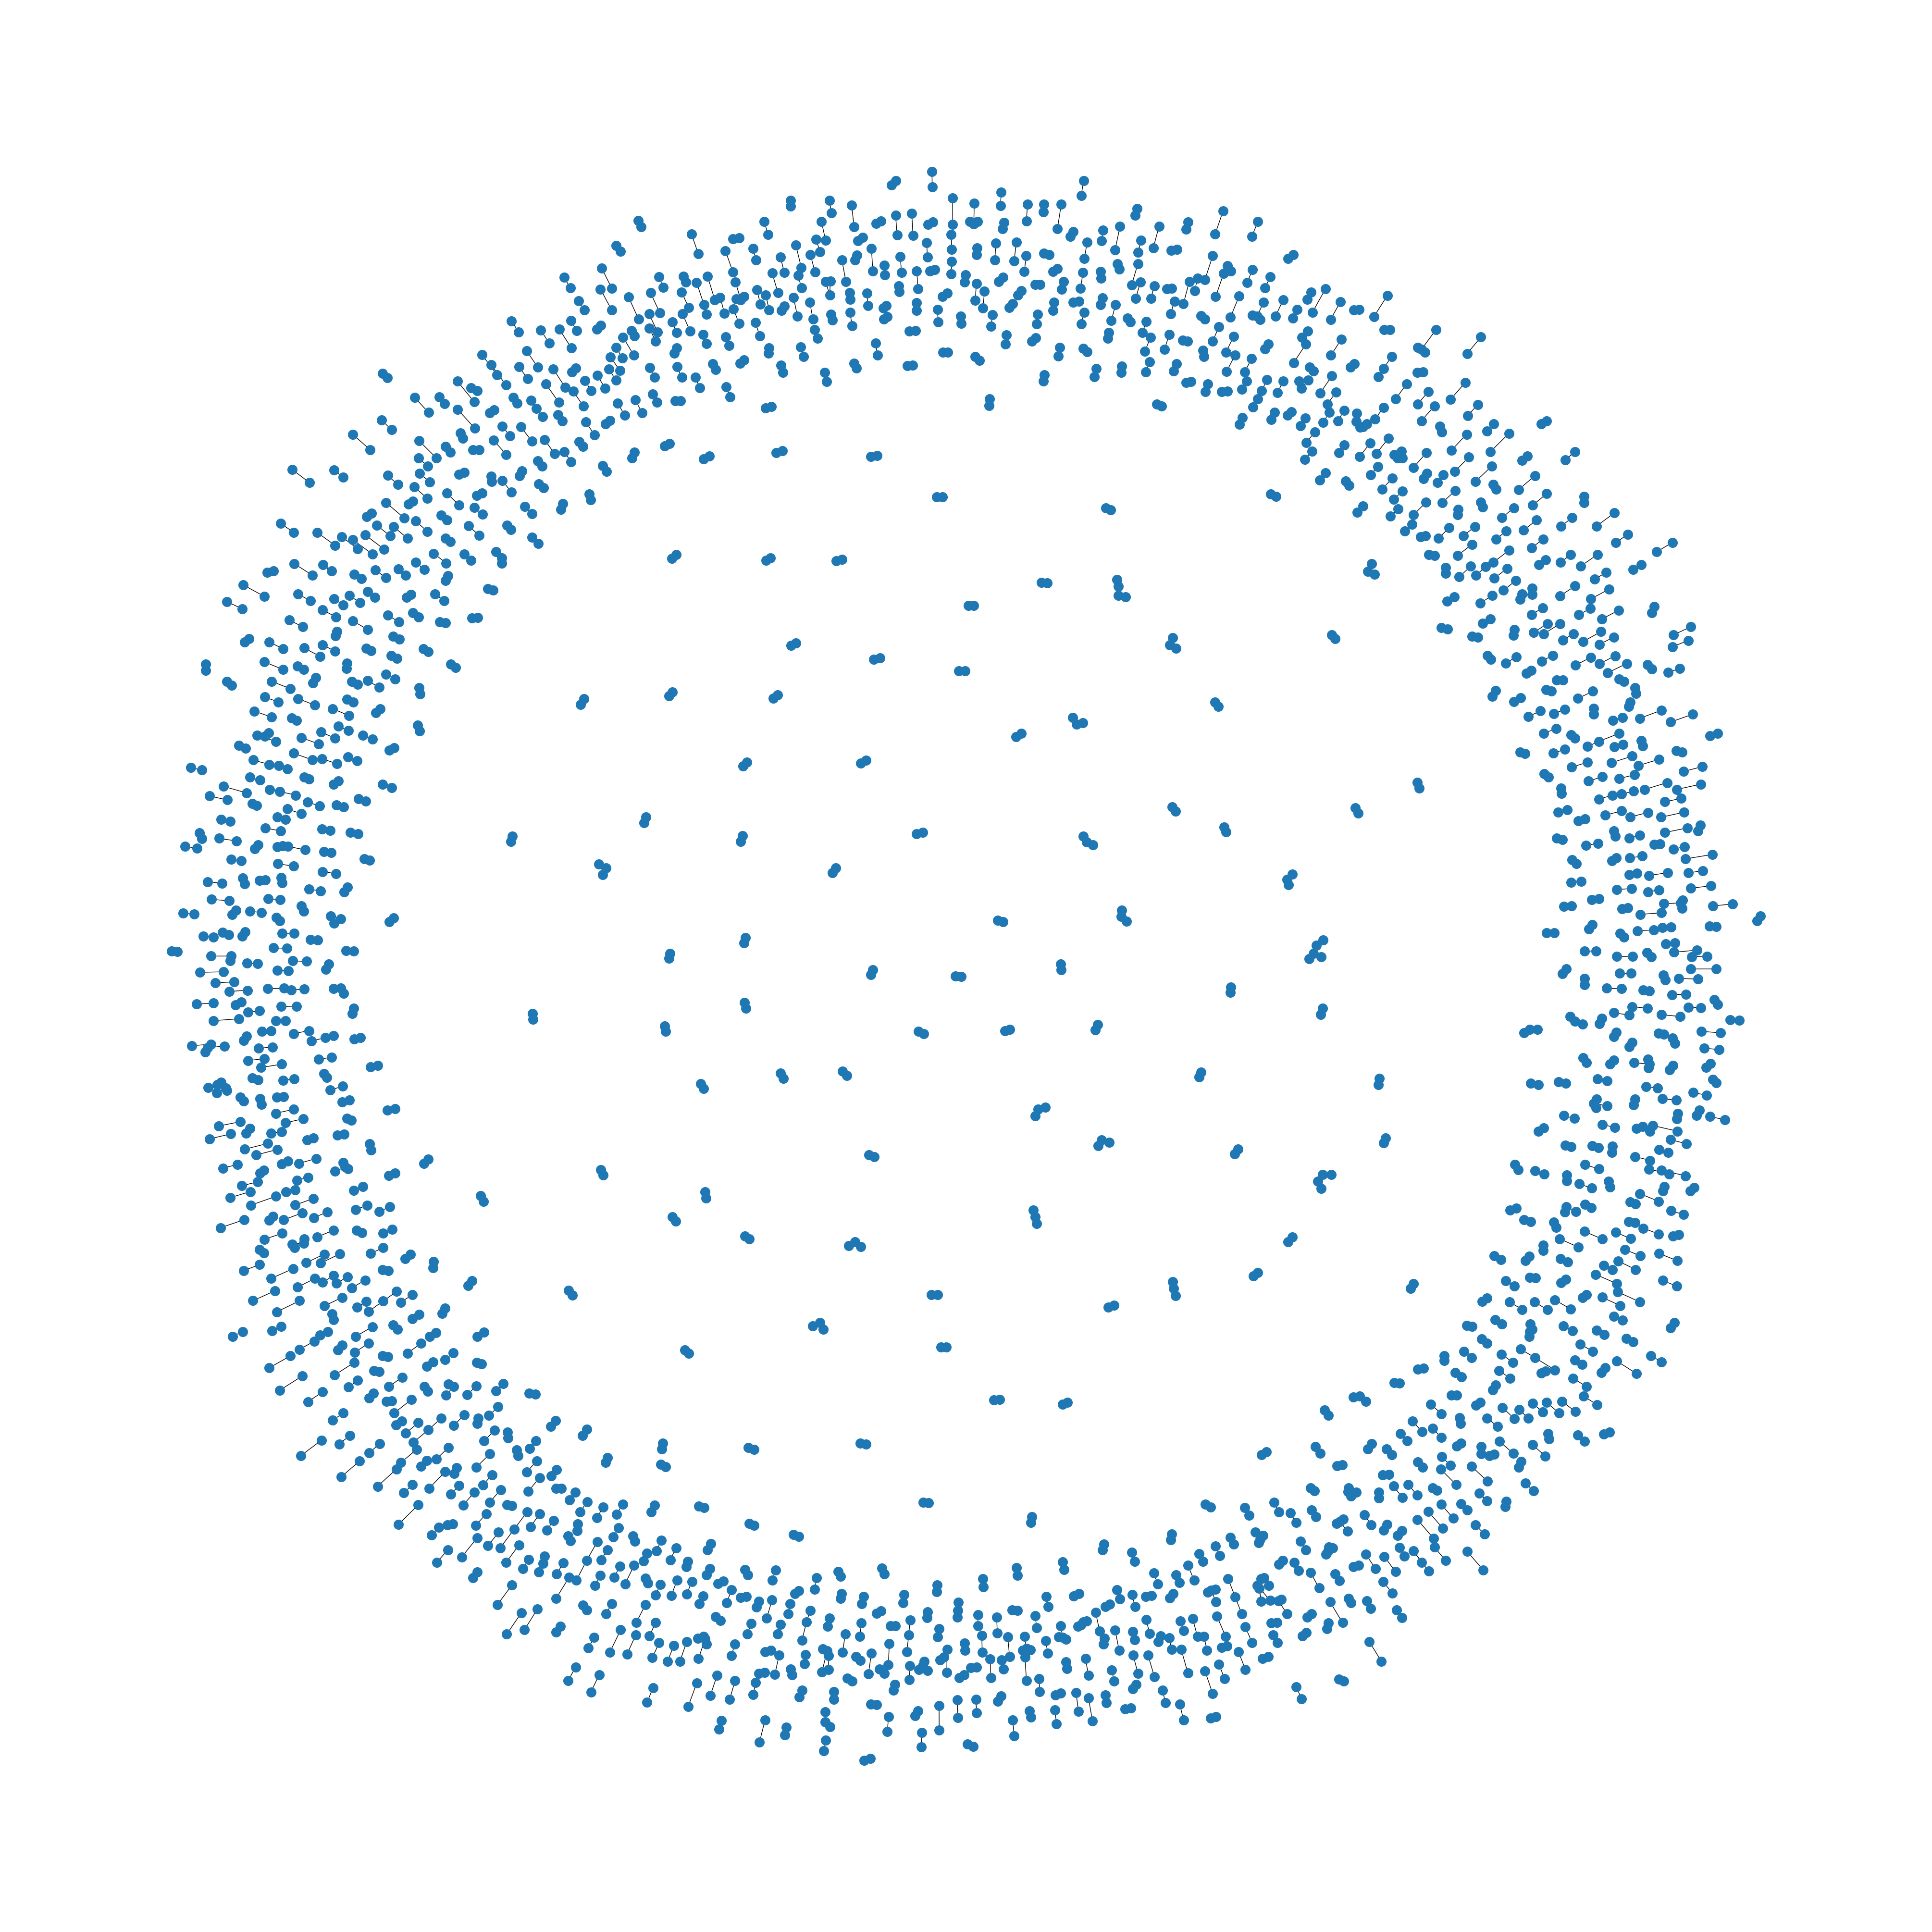

In [8]:
# visualize example graph
plt.figure(figsize=(40,40))
nx.draw_spring(example,
               with_labels=False,
               node_size=200)
plt.savefig("../data/images/test_graph.png")
plt.show()

In [14]:
# convert networks to torch geometric data objects
data_list = []
for graph in tqdm(graphs):
    data_list.append(from_networkx(graph))
print(f"Processed {len(data_list)} graphs!")

  0%|          | 0/3 [00:00<?, ?it/s]

Processed 3 graphs!


In [15]:
# create GAT
gat = GAT(in_channels=1, 
          hidden_channels=8,
          num_layers=2,
          out_channels=1)
gat

GAT(1, 1, num_layers=2)